# Хiд виконання роботи:
1. Взяти файл з даними у вiдповiдностi з варiантом.                       
                                        
                                            
2. Побудувати частi набори та асоцiативнi правила (АП), використовуючи алгоритм Apriori. Дослiдити множини АП залежно вiд параметрiв побудови АП:
* мiнiмальної пiдтримки,
* мiнiмальної достовiрностi,
* максимальної потужностi частих наборiв.  


Пiдiбрати значення параметрiв алгоритму Apriori, якi призводять до значущих АП. АП  $R_{k}$ вважати значущим, якщо покращення (improvement або лiфт (lift)): Improv($R_{k}$) > 1.  
       
      
      
3. Побудувати частi набори та множину АП, використовуючи алгоритм FP-росту. Дослiдити множини АП залежно вiд параметрiв побудови АП, якi було наведено вище для Apriori. Пiдiбрати значення параметрiв алгоритму FP-росту, якi призводять до значущих АП.  


  
4. Зробити висновки щодо впливу параметрiв алгоритмiв Apriori та FP-росту на знайденi множини АП.  
  
  
  
5. Знайти значення прогнозу на основi побудованої множини правил.  
  
  
  
6. Порiвняти результати, отриманi алгоритмами Apriori та FP-росту.


## Завдання згідно варіанту 17:
    Var_1_BreadBasket_DMS.csv

In [1]:
import mlxtend
import pandas as pd
import numpy as np
from IPython.display import HTML

# Data

In [2]:
dataset = pd.read_csv('Var_1_BreadBasket_DMS.csv', na_values='NONE', usecols=['Transaction', 'Item'],
                dtype= {'Transaction': np.int64, 'Item': str})

In [3]:
dataset.head(10)

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
5,3,Cookies
6,4,Muffin
7,5,Coffee
8,5,Pastry
9,5,Bread


In [4]:
print(f'Number of transactions: {dataset["Transaction"].max()}')
print(f'Number of unique items: {len(dataset["Item"].unique()) - 1}')
print(f'Number of missing values: {dataset.isnull().sum().sum()}')
print(f'Maximum transaction length: {dataset["Transaction"].value_counts().max()}')


Number of transactions: 9684
Number of unique items: 94
Number of missing values: 786
Maximum transaction length: 12


In [5]:
len(dataset['Transaction'].value_counts().loc[dataset['Transaction'].value_counts() == 1])

3474

In [6]:
dataset['Item'].value_counts().head(20)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64

In [7]:
dataset = dataset[dataset['Item'].notna()]

In [8]:
dataset = dataset.groupby(['Transaction']).Item.apply(np.array).reset_index()
dataset.sample(5)

,Transaction,Item
3062,3143,[Coffee]
1024,1046,"[Tea, Coffee, Truffles]"
8050,8236,[Bread]
4265,4378,"[Coffee, Bread]"
9060,9263,"[Scone, Pastry, Cake, Alfajores]"


In [9]:
X = dataset['Item']

In [10]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()
X_enc = encoder.fit(X).transform(X)
X_enc_df = pd.DataFrame(X_enc, columns=encoder.columns_)

In [11]:
X_enc_df

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
def style_negative(v, props=''):
    return props if v >= 1 else None

def custom_display(df, columns, colm_to_display, prop, ttype):
    df[columns] = df[columns].applymap(lambda x: tuple(x))
    if ttype == 0:
        display(df[colm_to_display].style.set_properties(**prop).hide_index())
    if ttype == 1:
        display(df[colm_to_display].style.set_properties(**prop)\
                .applymap(style_negative, props='background-color:#BEE5B0;', subset=['lift']).hide_index())

prop = {'background-color': '#F7F7F7',
                           'border-color': 'white'}



#  <p style="text-align: center;"> Association rules </p>

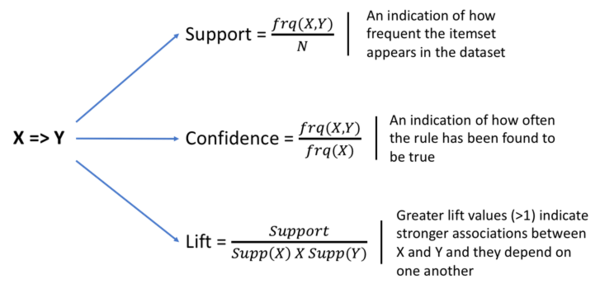

# Apriori

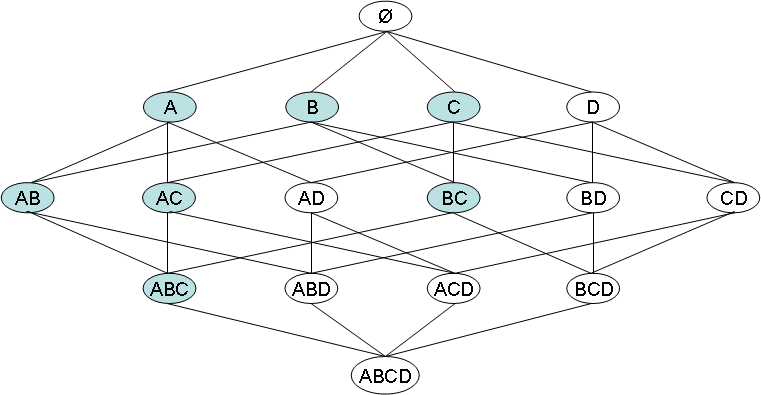

### Algorithm in a nutshell
1. Задати параметр мінімальної підтримки та мінімальної достовірності.
2. Знайти усі підмножини об'єктів з набору транзакцій, які мають підтримку >= за мінімальну.
3. Сформувати на їх основі правила, відкинути ті, достовірність яких менша за мінімальну.

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import ParameterGrid


columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']

min_supp = [0.3, 0.05, 0.01]
min_conf = [0.2, 0.5]
max_len = [2, 3]
params_grid = {
    'c_max_len': max_len,
    'b_min_conf': min_conf,
    'a_min_supp': min_supp
}
params = ParameterGrid(params_grid)


for param in params:
        print('---------------------------------------------------------------------------')
        print(f'           MIN SUPPORT: {param["a_min_supp"]},  MIN CONFIDENCE: {param["b_min_conf"]}, MAX LEN: {param["c_max_len"]}')
        freq_patterns = apriori(X_enc_df, min_support=param['a_min_supp'], max_len=param['c_max_len'],use_colnames=True)
        custom_display(freq_patterns, ['itemsets'], ['itemsets', 'support'], prop, 0)
        print(f'Number of frequent patterns: {len(freq_patterns)}')
        print()
        ar = association_rules(freq_patterns, metric='confidence', min_threshold=param['b_min_conf'])
        custom_display(ar, ['antecedents', 'consequents'], columns, prop, 1)
        print(f'Number of association rules: {len(ar)}')
        print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
           MIN SUPPORT: 0.3,  MIN CONFIDENCE: 0.2, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Coffee',)",0.478394


Number of frequent patterns: 2



antecedents,consequents,support,confidence,lift


Number of association rules: 0
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.3,  MIN CONFIDENCE: 0.2, MAX LEN: 3


itemsets,support
"('Bread',)",0.327205
"('Coffee',)",0.478394


Number of frequent patterns: 2



antecedents,consequents,support,confidence,lift


Number of association rules: 0
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.3,  MIN CONFIDENCE: 0.5, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Coffee',)",0.478394


Number of frequent patterns: 2



antecedents,consequents,support,confidence,lift


Number of association rules: 0
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.3,  MIN CONFIDENCE: 0.5, MAX LEN: 3


itemsets,support
"('Bread',)",0.327205
"('Coffee',)",0.478394


Number of frequent patterns: 2



antecedents,consequents,support,confidence,lift


Number of association rules: 0
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.05,  MIN CONFIDENCE: 0.2, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Cake',)",0.103856
"('Coffee',)",0.478394
"('Cookies',)",0.054411
"('Hot chocolate',)",0.058320
"('Medialuna',)",0.061807
"('Pastry',)",0.086107
"('Sandwich',)",0.071844
"('Tea',)",0.142631
"('Coffee', 'Bread')",0.090016


Number of frequent patterns: 11



antecedents,consequents,support,confidence,lift
"('Bread',)","('Coffee',)",0.090016,0.275105,0.575059
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515


Number of association rules: 2
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.05,  MIN CONFIDENCE: 0.2, MAX LEN: 3


itemsets,support
"('Bread',)",0.327205
"('Cake',)",0.103856
"('Coffee',)",0.478394
"('Cookies',)",0.054411
"('Hot chocolate',)",0.058320
"('Medialuna',)",0.061807
"('Pastry',)",0.086107
"('Sandwich',)",0.071844
"('Tea',)",0.142631
"('Coffee', 'Bread')",0.090016


Number of frequent patterns: 11



antecedents,consequents,support,confidence,lift
"('Bread',)","('Coffee',)",0.090016,0.275105,0.575059
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515


Number of association rules: 2
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.05,  MIN CONFIDENCE: 0.5, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Cake',)",0.103856
"('Coffee',)",0.478394
"('Cookies',)",0.054411
"('Hot chocolate',)",0.058320
"('Medialuna',)",0.061807
"('Pastry',)",0.086107
"('Sandwich',)",0.071844
"('Tea',)",0.142631
"('Coffee', 'Bread')",0.090016


Number of frequent patterns: 11



antecedents,consequents,support,confidence,lift
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515


Number of association rules: 1
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.05,  MIN CONFIDENCE: 0.5, MAX LEN: 3


itemsets,support
"('Bread',)",0.327205
"('Cake',)",0.103856
"('Coffee',)",0.478394
"('Cookies',)",0.054411
"('Hot chocolate',)",0.058320
"('Medialuna',)",0.061807
"('Pastry',)",0.086107
"('Sandwich',)",0.071844
"('Tea',)",0.142631
"('Coffee', 'Bread')",0.090016


Number of frequent patterns: 11



antecedents,consequents,support,confidence,lift
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515


Number of association rules: 1
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.01,  MIN CONFIDENCE: 0.2, MAX LEN: 2


itemsets,support
"('Alfajores',)",0.036344
"('Baguette',)",0.016059
"('Bread',)",0.327205
"('Brownie',)",0.040042
"('Cake',)",0.103856
"('Chicken Stew',)",0.012995
"('Coffee',)",0.478394
"('Coke',)",0.019440
"('Cookies',)",0.054411
"('Farm House',)",0.039197


Number of frequent patterns: 58



antecedents,consequents,support,confidence,lift
"('Alfajores',)","('Bread',)",0.010354,0.284884,0.870657
"('Alfajores',)","('Coffee',)",0.019651,0.540698,1.130235
"('Brownie',)","('Bread',)",0.010777,0.269129,0.822508
"('Cake',)","('Bread',)",0.023349,0.224822,0.687097
"('Bread',)","('Coffee',)",0.090016,0.275105,0.575059
"('Cookies',)","('Bread',)",0.014474,0.266019,0.813004
"('Hot chocolate',)","('Bread',)",0.013418,0.230072,0.703144
"('Medialuna',)","('Bread',)",0.016904,0.273504,0.835879
"('Pastry',)","('Bread',)",0.029160,0.338650,1.034977
"('Sandwich',)","('Bread',)",0.017010,0.236765,0.723596


Number of association rules: 26
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.01,  MIN CONFIDENCE: 0.2, MAX LEN: 3


itemsets,support
"('Alfajores',)",0.036344
"('Baguette',)",0.016059
"('Bread',)",0.327205
"('Brownie',)",0.040042
"('Cake',)",0.103856
"('Chicken Stew',)",0.012995
"('Coffee',)",0.478394
"('Coke',)",0.019440
"('Cookies',)",0.054411
"('Farm House',)",0.039197


Number of frequent patterns: 61



antecedents,consequents,support,confidence,lift
"('Alfajores',)","('Bread',)",0.010354,0.284884,0.870657
"('Alfajores',)","('Coffee',)",0.019651,0.540698,1.130235
"('Brownie',)","('Bread',)",0.010777,0.269129,0.822508
"('Cake',)","('Bread',)",0.023349,0.224822,0.687097
"('Bread',)","('Coffee',)",0.090016,0.275105,0.575059
"('Cookies',)","('Bread',)",0.014474,0.266019,0.813004
"('Hot chocolate',)","('Bread',)",0.013418,0.230072,0.703144
"('Medialuna',)","('Bread',)",0.016904,0.273504,0.835879
"('Pastry',)","('Bread',)",0.029160,0.338650,1.034977
"('Sandwich',)","('Bread',)",0.017010,0.236765,0.723596


Number of association rules: 31
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.01,  MIN CONFIDENCE: 0.5, MAX LEN: 2


itemsets,support
"('Alfajores',)",0.036344
"('Baguette',)",0.016059
"('Bread',)",0.327205
"('Brownie',)",0.040042
"('Cake',)",0.103856
"('Chicken Stew',)",0.012995
"('Coffee',)",0.478394
"('Coke',)",0.019440
"('Cookies',)",0.054411
"('Farm House',)",0.039197


Number of frequent patterns: 58



antecedents,consequents,support,confidence,lift
"('Alfajores',)","('Coffee',)",0.019651,0.540698,1.130235
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515
"('Cookies',)","('Coffee',)",0.028209,0.518447,1.083723
"('Hot chocolate',)","('Coffee',)",0.029583,0.507246,1.060311
"('Juice',)","('Coffee',)",0.020602,0.534247,1.116750
"('Medialuna',)","('Coffee',)",0.035182,0.569231,1.189878
"('Pastry',)","('Coffee',)",0.047544,0.552147,1.154168
"('Sandwich',)","('Coffee',)",0.038246,0.532353,1.112792
"('Scone',)","('Coffee',)",0.018067,0.522936,1.093107
"('Spanish Brunch',)","('Coffee',)",0.010882,0.598837,1.251766


Number of association rules: 11
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.01,  MIN CONFIDENCE: 0.5, MAX LEN: 3


itemsets,support
"('Alfajores',)",0.036344
"('Baguette',)",0.016059
"('Bread',)",0.327205
"('Brownie',)",0.040042
"('Cake',)",0.103856
"('Chicken Stew',)",0.012995
"('Coffee',)",0.478394
"('Coke',)",0.019440
"('Cookies',)",0.054411
"('Farm House',)",0.039197


Number of frequent patterns: 61



antecedents,consequents,support,confidence,lift
"('Alfajores',)","('Coffee',)",0.019651,0.540698,1.130235
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515
"('Cookies',)","('Coffee',)",0.028209,0.518447,1.083723
"('Hot chocolate',)","('Coffee',)",0.029583,0.507246,1.060311
"('Juice',)","('Coffee',)",0.020602,0.534247,1.116750
"('Medialuna',)","('Coffee',)",0.035182,0.569231,1.189878
"('Pastry',)","('Coffee',)",0.047544,0.552147,1.154168
"('Sandwich',)","('Coffee',)",0.038246,0.532353,1.112792
"('Scone',)","('Coffee',)",0.018067,0.522936,1.093107
"('Spanish Brunch',)","('Coffee',)",0.010882,0.598837,1.251766


Number of association rules: 11
---------------------------------------------------------------------------


# FP-growth

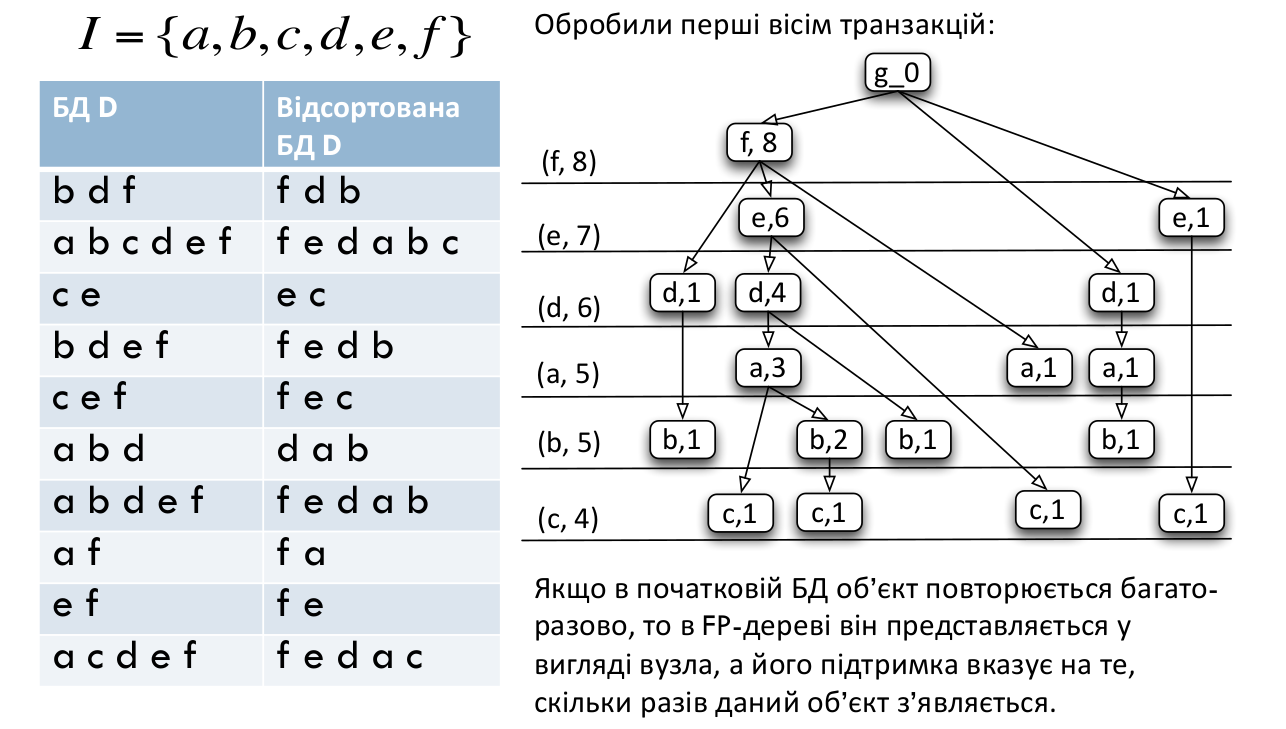

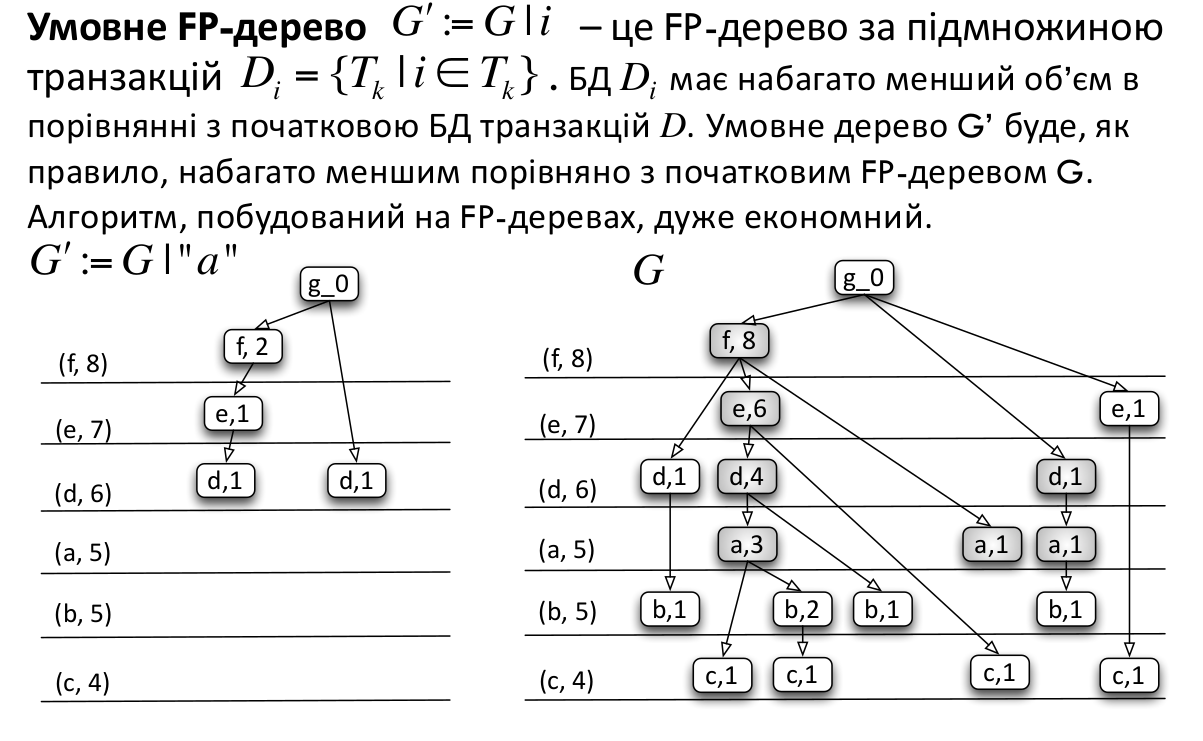

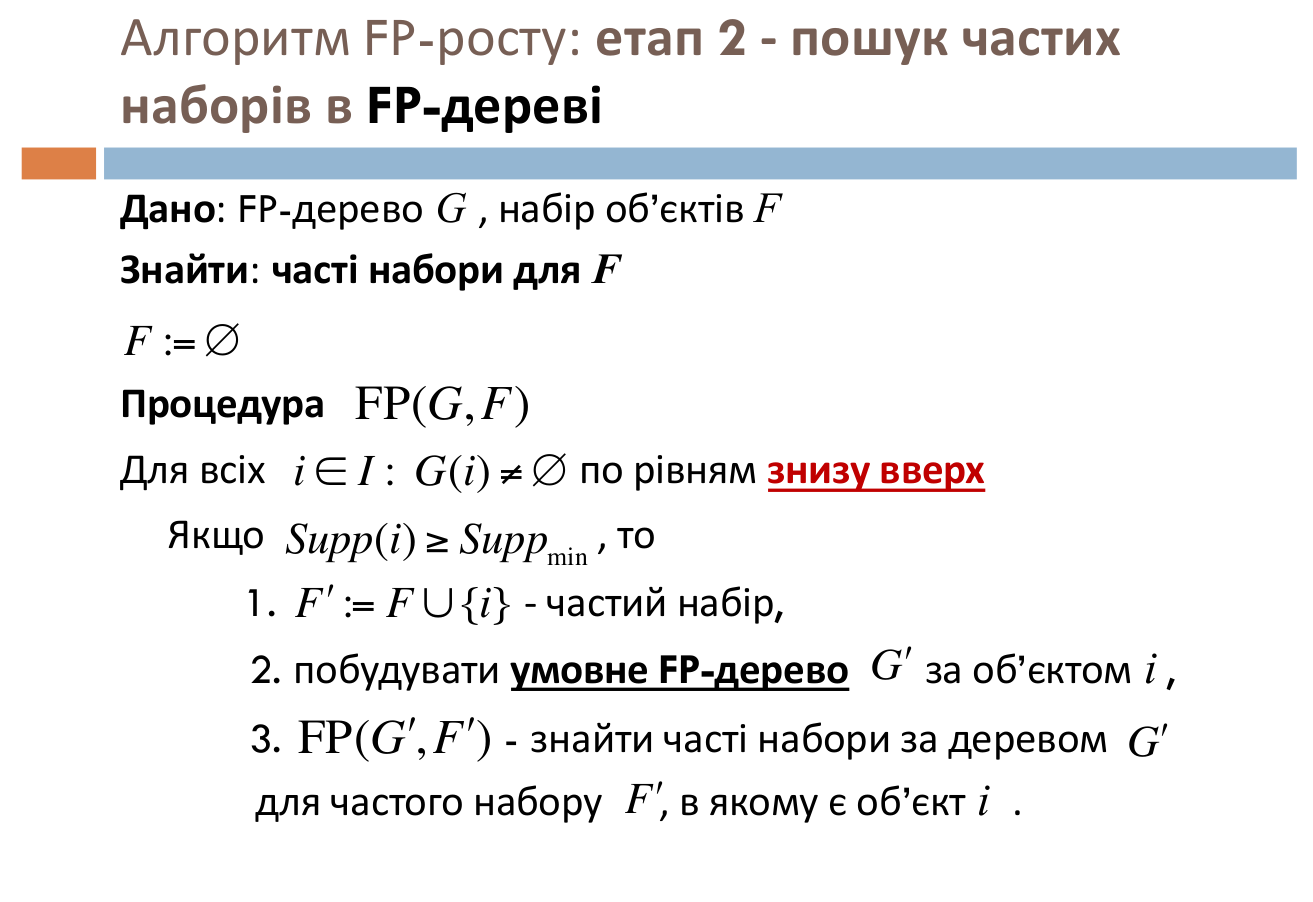

In [253]:
from mlxtend.frequent_patterns import fpgrowth

columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']

min_supp = [0.3, 0.05, 0.01]
min_conf = [0.2, 0.5]
max_len = [2, 4]

params_grid = {
    'c_max_len': max_len,
    'b_min_conf': min_conf,
    'a_min_supp': min_supp
}
params = ParameterGrid(params_grid)

for param in params:
        print('---------------------------------------------------------------------------')
        print(f'           MIN SUPPORT: {param["a_min_supp"]},  MIN CONFIDENCE: {param["b_min_conf"]}, MAX LEN: {param["c_max_len"]}')
        freq_patterns = fpgrowth(X_enc_df, min_support=param['a_min_supp'], max_len=param['c_max_len'],use_colnames=True)
        custom_display(freq_patterns, ['itemsets'], ['itemsets', 'support'], prop, 0)
        print(f'Number of frequent patterns: {len(freq_patterns)}')
        print()
        ar = association_rules(freq_patterns, metric='confidence', min_threshold=param['b_min_conf'])
        custom_display(ar, ['antecedents', 'consequents'], columns, prop, 1)
        print(f'Number of association rules: {len(ar)}')
        print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
           MIN SUPPORT: 0.3,  MIN CONFIDENCE: 0.2, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Coffee',)",0.478394


Number of frequent patterns: 2



antecedents,consequents,support,confidence,lift


Number of association rules: 0
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.3,  MIN CONFIDENCE: 0.2, MAX LEN: 4


itemsets,support
"('Bread',)",0.327205
"('Coffee',)",0.478394


Number of frequent patterns: 2



antecedents,consequents,support,confidence,lift


Number of association rules: 0
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.3,  MIN CONFIDENCE: 0.5, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Coffee',)",0.478394


Number of frequent patterns: 2



antecedents,consequents,support,confidence,lift


Number of association rules: 0
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.3,  MIN CONFIDENCE: 0.5, MAX LEN: 4


itemsets,support
"('Bread',)",0.327205
"('Coffee',)",0.478394


Number of frequent patterns: 2



antecedents,consequents,support,confidence,lift


Number of association rules: 0
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.05,  MIN CONFIDENCE: 0.2, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Hot chocolate',)",0.058320
"('Cookies',)",0.054411
"('Coffee',)",0.478394
"('Pastry',)",0.086107
"('Medialuna',)",0.061807
"('Tea',)",0.142631
"('Cake',)",0.103856
"('Sandwich',)",0.071844
"('Bread', 'Coffee')",0.090016


Number of frequent patterns: 11



antecedents,consequents,support,confidence,lift
"('Bread',)","('Coffee',)",0.090016,0.275105,0.575059
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515


Number of association rules: 2
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.05,  MIN CONFIDENCE: 0.2, MAX LEN: 4


itemsets,support
"('Bread',)",0.327205
"('Hot chocolate',)",0.058320
"('Cookies',)",0.054411
"('Coffee',)",0.478394
"('Pastry',)",0.086107
"('Medialuna',)",0.061807
"('Tea',)",0.142631
"('Cake',)",0.103856
"('Sandwich',)",0.071844
"('Bread', 'Coffee')",0.090016


Number of frequent patterns: 11



antecedents,consequents,support,confidence,lift
"('Bread',)","('Coffee',)",0.090016,0.275105,0.575059
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515


Number of association rules: 2
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.05,  MIN CONFIDENCE: 0.5, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Hot chocolate',)",0.058320
"('Cookies',)",0.054411
"('Coffee',)",0.478394
"('Pastry',)",0.086107
"('Medialuna',)",0.061807
"('Tea',)",0.142631
"('Cake',)",0.103856
"('Sandwich',)",0.071844
"('Bread', 'Coffee')",0.090016


Number of frequent patterns: 11



antecedents,consequents,support,confidence,lift
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515


Number of association rules: 1
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.05,  MIN CONFIDENCE: 0.5, MAX LEN: 4


itemsets,support
"('Bread',)",0.327205
"('Hot chocolate',)",0.058320
"('Cookies',)",0.054411
"('Coffee',)",0.478394
"('Pastry',)",0.086107
"('Medialuna',)",0.061807
"('Tea',)",0.142631
"('Cake',)",0.103856
"('Sandwich',)",0.071844
"('Bread', 'Coffee')",0.090016


Number of frequent patterns: 11



antecedents,consequents,support,confidence,lift
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515


Number of association rules: 1
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.01,  MIN CONFIDENCE: 0.2, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Scandinavian',)",0.029054
"('Hot chocolate',)",0.058320
"('Cookies',)",0.054411
"('Jam',)",0.015003
"('Muffin',)",0.038457
"('Coffee',)",0.478394
"('Pastry',)",0.086107
"('Medialuna',)",0.061807
"('Tea',)",0.142631


Number of frequent patterns: 58



antecedents,consequents,support,confidence,lift
"('Bread',)","('Coffee',)",0.090016,0.275105,0.575059
"('Hot chocolate',)","('Coffee',)",0.029583,0.507246,1.060311
"('Hot chocolate',)","('Bread',)",0.013418,0.230072,0.703144
"('Cookies',)","('Coffee',)",0.028209,0.518447,1.083723
"('Cookies',)","('Bread',)",0.014474,0.266019,0.813004
"('Muffin',)","('Coffee',)",0.018806,0.489011,1.022193
"('Pastry',)","('Coffee',)",0.047544,0.552147,1.154168
"('Pastry',)","('Bread',)",0.029160,0.338650,1.034977
"('Medialuna',)","('Coffee',)",0.035182,0.569231,1.189878
"('Medialuna',)","('Bread',)",0.016904,0.273504,0.835879


Number of association rules: 26
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.01,  MIN CONFIDENCE: 0.2, MAX LEN: 4


itemsets,support
"('Bread',)",0.327205
"('Scandinavian',)",0.029054
"('Hot chocolate',)",0.058320
"('Cookies',)",0.054411
"('Jam',)",0.015003
"('Muffin',)",0.038457
"('Coffee',)",0.478394
"('Pastry',)",0.086107
"('Medialuna',)",0.061807
"('Tea',)",0.142631


Number of frequent patterns: 61



antecedents,consequents,support,confidence,lift
"('Bread',)","('Coffee',)",0.090016,0.275105,0.575059
"('Hot chocolate',)","('Coffee',)",0.029583,0.507246,1.060311
"('Hot chocolate',)","('Bread',)",0.013418,0.230072,0.703144
"('Cookies',)","('Coffee',)",0.028209,0.518447,1.083723
"('Cookies',)","('Bread',)",0.014474,0.266019,0.813004
"('Muffin',)","('Coffee',)",0.018806,0.489011,1.022193
"('Pastry',)","('Coffee',)",0.047544,0.552147,1.154168
"('Pastry',)","('Bread',)",0.029160,0.338650,1.034977
"('Bread', 'Pastry')","('Coffee',)",0.011199,0.384058,0.802807
"('Coffee', 'Pastry')","('Bread',)",0.011199,0.235556,0.719901


Number of association rules: 31
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.01,  MIN CONFIDENCE: 0.5, MAX LEN: 2


itemsets,support
"('Bread',)",0.327205
"('Scandinavian',)",0.029054
"('Hot chocolate',)",0.058320
"('Cookies',)",0.054411
"('Jam',)",0.015003
"('Muffin',)",0.038457
"('Coffee',)",0.478394
"('Pastry',)",0.086107
"('Medialuna',)",0.061807
"('Tea',)",0.142631


Number of frequent patterns: 58



antecedents,consequents,support,confidence,lift
"('Hot chocolate',)","('Coffee',)",0.029583,0.507246,1.060311
"('Cookies',)","('Coffee',)",0.028209,0.518447,1.083723
"('Pastry',)","('Coffee',)",0.047544,0.552147,1.154168
"('Medialuna',)","('Coffee',)",0.035182,0.569231,1.189878
"('Juice',)","('Coffee',)",0.020602,0.534247,1.116750
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515
"('Sandwich',)","('Coffee',)",0.038246,0.532353,1.112792
"('Alfajores',)","('Coffee',)",0.019651,0.540698,1.130235
"('Toast',)","('Coffee',)",0.023666,0.704403,1.472431
"('Scone',)","('Coffee',)",0.018067,0.522936,1.093107


Number of association rules: 11
---------------------------------------------------------------------------
---------------------------------------------------------------------------
           MIN SUPPORT: 0.01,  MIN CONFIDENCE: 0.5, MAX LEN: 4


itemsets,support
"('Bread',)",0.327205
"('Scandinavian',)",0.029054
"('Hot chocolate',)",0.058320
"('Cookies',)",0.054411
"('Jam',)",0.015003
"('Muffin',)",0.038457
"('Coffee',)",0.478394
"('Pastry',)",0.086107
"('Medialuna',)",0.061807
"('Tea',)",0.142631


Number of frequent patterns: 61



antecedents,consequents,support,confidence,lift
"('Hot chocolate',)","('Coffee',)",0.029583,0.507246,1.060311
"('Cookies',)","('Coffee',)",0.028209,0.518447,1.083723
"('Pastry',)","('Coffee',)",0.047544,0.552147,1.154168
"('Medialuna',)","('Coffee',)",0.035182,0.569231,1.189878
"('Juice',)","('Coffee',)",0.020602,0.534247,1.116750
"('Cake',)","('Coffee',)",0.054728,0.526958,1.101515
"('Sandwich',)","('Coffee',)",0.038246,0.532353,1.112792
"('Alfajores',)","('Coffee',)",0.019651,0.540698,1.130235
"('Toast',)","('Coffee',)",0.023666,0.704403,1.472431
"('Scone',)","('Coffee',)",0.018067,0.522936,1.093107


Number of association rules: 11
---------------------------------------------------------------------------


# Forecast

In [254]:
freq_patt = fpgrowth(X_enc_df, min_support=0.005, max_len=4,use_colnames=True)
a_rules = association_rules(freq_patt, metric='lift', min_threshold=1.0)

In [255]:
def if_then(item, assoc_rules, confidence):
    result = assoc_rules.loc[assoc_rules['antecedents'] == frozenset([item])]\
                        .loc[assoc_rules['confidence'] >= confidence]
    if len(result) == 0:
        return 'No results for this confidence level'
    return result

In [256]:
if_then('Toast', a_rules, 0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582


In [257]:
if_then('Pastry', a_rules, 0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
33,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305


# Conclusions

1. Найбільший вплив на результат мають значення мінімальної підтримки та мінімальної достовірності. Найоптимальнішими значеннями min_support, min_confidence, max_length для обох алгоритмів виявилися 0.01, 0.5, 3 відповідно. Відповідно до отриманих суттєвих асоціативних правил, спостерігаємо, що яку б випічку не обрав клієнт скоріш за все він візьме до неї каву.                                                                                                               
                            
                            
                            
                            
                            
                            
                            
                            
                                        
2. Результати отримані за допомогою Apriori та FP дерева - однакові, але останній алгоритм працює значно швидше.